# TP Regression

## 1 - Régression linéaire par moindres carrés

In [454]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [455]:
data = np.loadtxt("dataRegLin2D.txt")
X1 = data[:, 0]  # Première colonne (x1)
X2 = data[:, 1]  # Deuxième colonne (x2)
y = data[:, 2]   # Troisième colonne (y)

Cette fonction applique la **régression linéaire** en utilisant la **formule analytique** des moindres carrés :

$$
w = (X^T X)^{-1} X^T y
$$


In [456]:
def regression_moindres_carres(X, y):
    X_biais = np.c_[np.ones((X.shape[0], 1)), X]
    w = np.linalg.inv(X_biais.T.dot(X_biais)).dot(X_biais.T).dot(y)
    return w

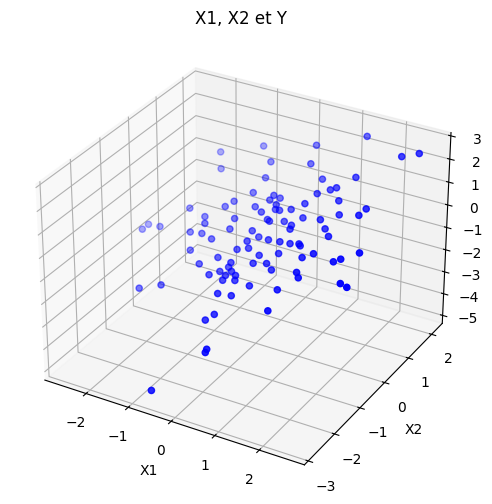

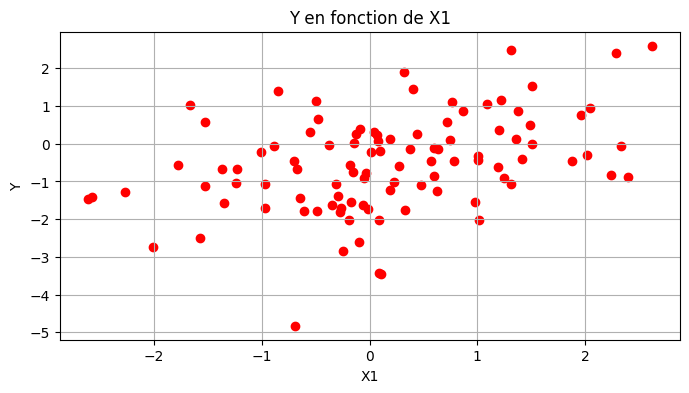

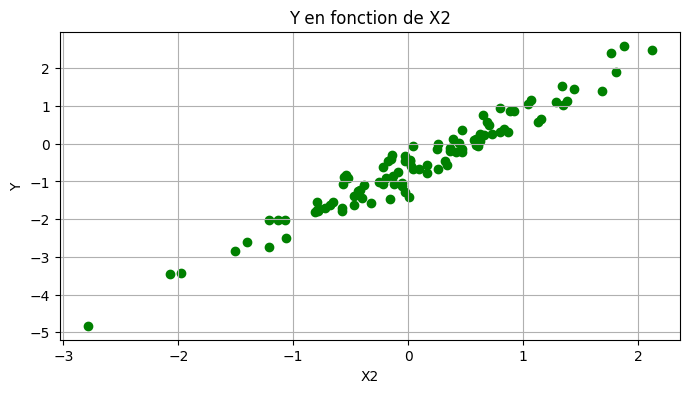

In [457]:
    # Graphique 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, c='b', marker='o')

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.set_title("X1, X2 et Y")

plt.show()

# Graphique 2D : y en fonction de X1
plt.figure(figsize=(8, 4))
plt.scatter(X1, y, color='r', marker='o')
plt.xlabel("X1")
plt.ylabel("Y")
plt.title("Y en fonction de X1")
plt.grid()
plt.show()

# Graphique 2D : y en fonction de X2
plt.figure(figsize=(8, 4))
plt.scatter(X2, y, color='g', marker='o')
plt.xlabel("X2")
plt.ylabel("Y")
plt.title("Y en fonction de X2")
plt.grid()
plt.show()


- \( Y \) dépend fortement de \( X2 \) de manière linéaire (points bien alignés).  
- Aucune relation linéaire évidente entre \( Y \) et \( X1 \) (dispersion aléatoire).  
- \( X2 \) est le facteur dominant pour prédire \( Y \).

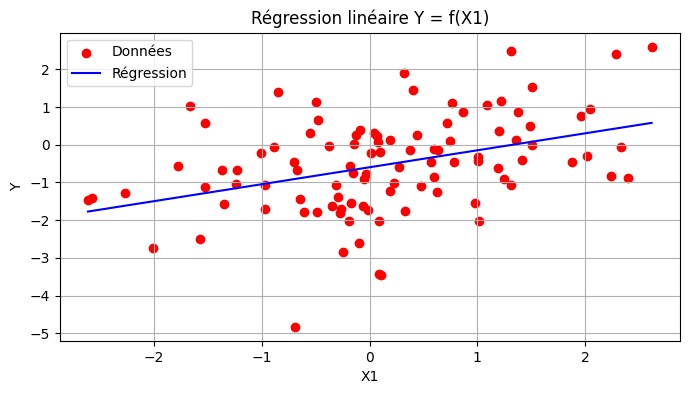

In [458]:
w1 = regression_moindres_carres(X1, y)
X1_pred = np.linspace(X1.min(), X1.max(), 100).reshape(-1, 1)
Y1_pred = np.c_[np.ones((X1_pred.shape[0], 1)), X1_pred] @ w1 
plt.figure(figsize=(8, 4))
plt.scatter(X1, y, color='r', label="Données")
plt.plot(X1_pred, Y1_pred, color='b', label="Régression")
plt.xlabel("X1")
plt.ylabel("Y")
plt.title("Régression linéaire Y = f(X1)")
plt.legend()
plt.grid()
plt.show()

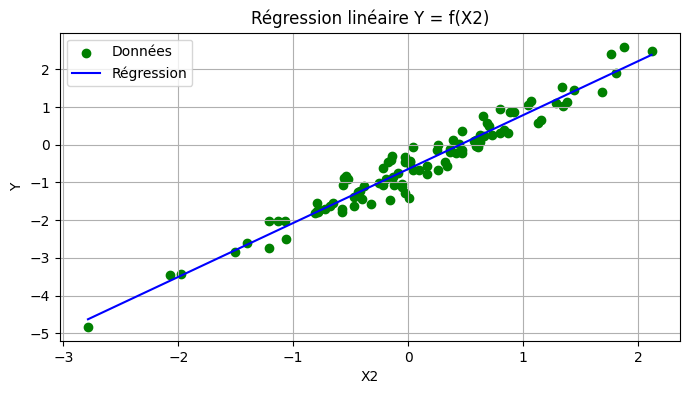

In [459]:
w2 = regression_moindres_carres(X2, y)
X2_pred = np.linspace(X2.min(), X2.max(), 100).reshape(-1, 1)
Y2_pred = np.c_[np.ones((X2_pred.shape[0], 1)), X2_pred] @ w2  # Prédiction

plt.figure(figsize=(8, 4))
plt.scatter(X2, y, color='g', label="Données")
plt.plot(X2_pred, Y2_pred, color='b', label="Régression")
plt.xlabel("X2")
plt.ylabel("Y")
plt.title("Régression linéaire Y = f(X2)")
plt.legend()
plt.grid()
plt.show()

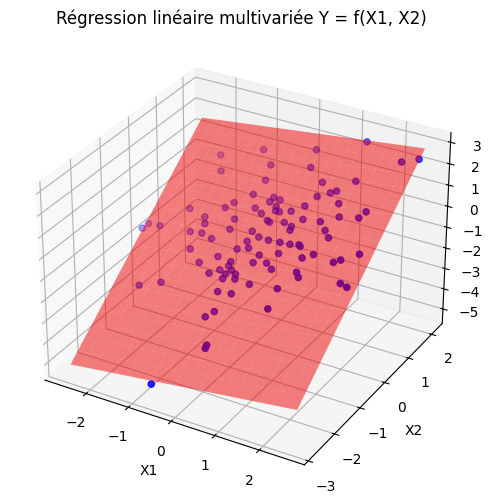

In [460]:
# 🎯 3️⃣ Régression Y = f(X1, X2) (Multivariée)
X_multi = np.c_[X1, X2]  # Matrice avec X1 et X2
w_multi = regression_moindres_carres(X_multi, y)

# Générer des prédictions pour la surface 3D
X1_range = np.linspace(X1.min(), X1.max(), 20)
X2_range = np.linspace(X2.min(), X2.max(), 20)
X1_grid, X2_grid = np.meshgrid(X1_range, X2_range)
Y_grid = w_multi[0] + w_multi[1] * X1_grid + w_multi[2] * X2_grid

# Tracé 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, color='b', label="Données")
ax.plot_surface(X1_grid, X2_grid, Y_grid, alpha=0.5, color='r')

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.set_title("Régression linéaire multivariée Y = f(X1, X2)")
plt.show()

- Graphique 1 : Régression linéaire entre Y et X1.
    → Pas de tendance forte (comme observé précédemment).
- Graphique 2 : Régression linéaire entre Y et X2.
    → Bonne approximation linéaire, car X2 influence fortement Y.
- Graphique 3 : Régression linéaire multivariée en 3D.
    → Plan de régression qui s'ajuste aux données.

In [461]:
def predire(xtest, w):
    xtest_biais = np.c_[np.ones((xtest.shape[0], 1)), xtest]  # Ajout du biais
    return xtest_biais @ w  # Produit matriciel pour obtenir ytest

In [462]:
def erreur_prediction(X, y, w):
    y_pred = predire(X, w)  # Prédictions sur les données d'entraînement
    err = np.mean((y - y_pred) ** 2)  
    return err

In [463]:
X = np.c_[X1, X2]  # Matrice avec X1 et X2

w_appris = regression_moindres_carres(X, y)

# Tester la prédiction avec une nouvelle donnée
xtest = np.array([[1, 2]])  # Exemple arbitraire
ytest_pred = predire(xtest, w_appris)

# Calculer l'erreur sur les données d'entraînement
err_train = erreur_prediction(X, y, w_appris)

# Afficher les résultats
print("Vecteur des coefficients appris (w) :", w_appris)
print("Prédiction pour xtest =", xtest, "-> ytest =", ytest_pred)
print("Erreur quadratique moyenne sur les données d'entraînement :", err_train)

Vecteur des coefficients appris (w) : [-0.67806079  0.2451943   1.37054629]
Prédiction pour xtest = [[1 2]] -> ytest = [2.3082261]
Erreur quadratique moyenne sur les données d'entraînement : 0.010247981453700135



1. **Vecteur des coefficients appris \( w \) :**  
   - **\( w_0 = -0.678 \)** → Terme de biais (intercept).
   - **\( w_1 = 0.245 \)** → Influence de \( X_1 \) sur \( Y \).
   - **\( w_2 = 1.370 \)** → Influence de \( X_2 \) sur \( Y \), qui est plus forte que \( X_1 \).

2. **Prédiction pour \[ x_test = (1,2) ] :**  
   - Le modèle prédit **\( Y \approx 2.31 \)** pour une nouvelle donnée \( (X_1 = 1, X_2 = 2) \).
   - La valeur semble **cohérente** avec la tendance observée.

3. **Erreur quadratique moyenne sur l’ensemble d’entraînement :**  
   \[
   err = 0.0102
   \]
   - Cette erreur est très faible, ce qui indique que le modèle s’adapte bien aux données d’apprentissage.
   - Une erreur faible signifie que les prédictions du modèle sont proches des valeurs réelles.

Le modèle de régression linéaire est performant, avec une bonne précision sur les données d’apprentissage.  
X_2 a une forte influence sur \( Y \), confirmant son importance dans la prédiction.  
Erreur faible, donc l’approximation linéaire est adaptée aux données.

## 2 - Régression linéaire avec Scikit-learn

### 2-1 sur les mêmes données simulées

Vecteur des coefficients appris (w) :  [np.float64(-0.6780607876728961), np.float64(0.24519429589670064), np.float64(1.3705462947294642)]
Erreur quadratique moyenne sur les données d'entraînement : 0.010247981453700133


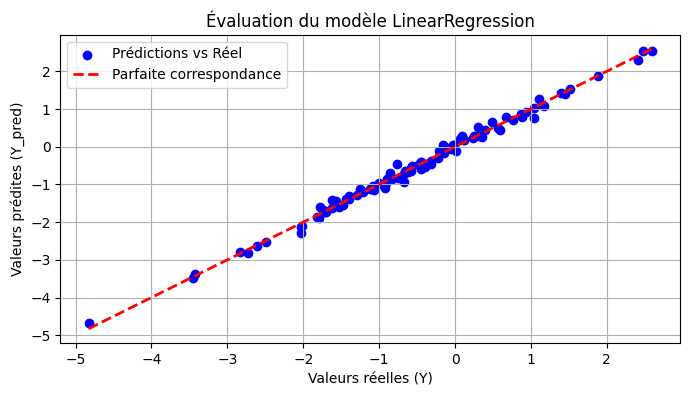

In [464]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X, y)  # Entraînement du modèle

# Obtenir les coefficients appris
w0 = model.intercept_  # Biais
w1, w2 = model.coef_   # Coefficients de X1 et X2

# Affichage des résultats
print("Vecteur des coefficients appris (w) : ", [w0, w1, w2])

# 🎯 Faire des prédictions sur les données d'entraînement
y_pred = model.predict(X)

# 📉 Calculer l'erreur quadratique moyenne (MSE)
mse_train = mean_squared_error(y, y_pred)
print("Erreur quadratique moyenne sur les données d'entraînement :", mse_train)

# 🖼️ Visualisation des résultats
plt.figure(figsize=(8, 4))
plt.scatter(y, y_pred, color='blue', label="Prédictions vs Réel")
plt.xlabel("Valeurs réelles (Y)")
plt.ylabel("Valeurs prédites (Y_pred)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label="Parfaite correspondance")
plt.legend()
plt.title("Évaluation du modèle LinearRegression")
plt.grid()
plt.show()

Le modèle obtenu est :
$$
y =−0.678+0.245⋅x1+1.371⋅x2,
$$
avec une erreur quadratique moyenne de l’ordre de 0,01025, ce qui indique un très bon ajustement sur les données d’entraînement. Le coefficient associé à x2​ (1.3711.371) est nettement plus grand que celui associé à x1​ (0.2450.245), suggérant que la variable x2​ a un impact plus fort sur la prédiction de y. Le biais (−0.678−0.678) traduit la valeur prédite lorsque x1​ et x2​ sont tous deux nuls.

### 2-2 sur des données réelles


Jeu de données Diabetes :
  - Erreur quadratique moyenne (MSE) : 2821.750981001311
  - Coefficient de détermination (R²) : 0.4772897164322617


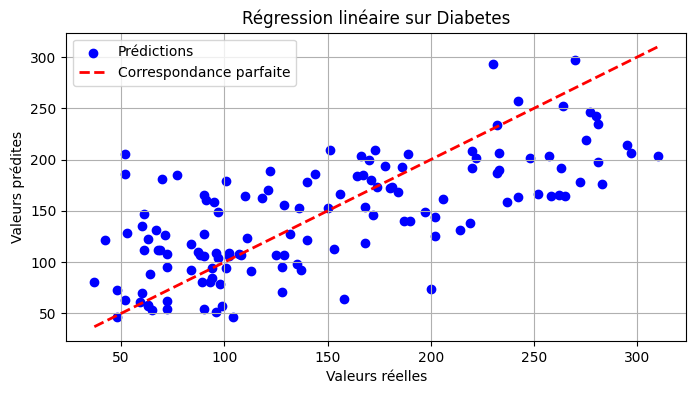

In [465]:
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
X_diabetes = diabetes.data   
y_diabetes = diabetes.target  

X_train, X_test, y_train, y_test = train_test_split(
    X_diabetes, y_diabetes, test_size=0.3, random_state=42)

model_diabetes = LinearRegression()
model_diabetes.fit(X_train, y_train)

y_pred_d = model_diabetes.predict(X_test)

mse_diabetes = mean_squared_error(y_test, y_pred_d)
r2_diabetes = r2_score(y_test, y_pred_d)

print("\nJeu de données Diabetes :")
print("  - Erreur quadratique moyenne (MSE) :", mse_diabetes)
print("  - Coefficient de détermination (R²) :", r2_diabetes)

plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred_d, color='blue', label="Prédictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Correspondance parfaite")
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Régression linéaire sur Diabetes")
plt.legend()
plt.grid()
plt.show()

- L’erreur quadratique moyenne est d’environ **2821,75**, ce qui indique une différence notable entre les valeurs réelles et prédites, même si le modèle parvient tout de même à capturer une partie de la relation.
- Le **coefficient de détermination (R²)** est d’environ **0,477**, signifiant que le modèle explique près de 47,7 % de la variance de la cible. Il s’agit d’une performance moyenne : la relation est en partie linéaire, mais il reste une dispersion importante autour de la diagonale.

> **Remarque :**  
> Le jeu de données Boston n'est plus inclus dans Scikit-learn depuis la version 1.2.

### 2-3 et avec régularisation : Ridge et Lasso

In [466]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)

print("=== Régression Ridge ===")
print("  Coefficients      :", ridge_reg.coef_)
print("  Intercept (biais) :", ridge_reg.intercept_)

y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"  MSE (test)        : {mse_ridge:.4f}")
print(f"  R² (test)         : {r2_ridge:.4f}")

print("\n=== Régression Lasso ===")
print("  Coefficients      :", lasso_reg.coef_)
print("  Intercept (biais) :", lasso_reg.intercept_)

y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"  MSE (test)        : {mse_lasso:.4f}")
print(f"  R² (test)         : {r2_lasso:.4f}")


=== Régression Ridge ===
  Coefficients      : [  45.05421022  -71.94739737  280.71625182  195.21266175   -2.22930269
  -17.54079744 -148.68886188  120.46723979  198.61440137  106.93469215]
  Intercept (biais) : 151.86746422977902
  MSE (test)        : 3112.9664
  R² (test)         : 0.4233

=== Régression Lasso ===
  Coefficients      : [  0.          -0.         443.7033885   51.60109433   0.
   0.          -0.           0.         201.96647823   0.        ]
  Intercept (biais) : 152.16591884353062
  MSE (test)        : 3444.6708
  R² (test)         : 0.3619


Ridge (pénalisation \( \|w\|_2^2 \))
- **Réduction des coefficients :**  
  Les coefficients sont réduits en magnitude mais rarement amenés à zéro.
- **Objectif :**  
  Contrôler la variance du modèle et éviter le surapprentissage en rendant les poids plus « petits ».

Lasso (pénalisation \( \|w\|_1 \))
- **Sélection de variables :**  
  Certains coefficients peuvent être exactement nuls, ce qui effectue une forme de sélection de variables automatique.
- **Impact de la pénalisation :**  
  Avec \( \alpha = 1.0 \), il est possible que certains attributs du jeu de données soient complètement ignorés si leur contribution est jugée faible.

Conclusion sur le jeu de données Diabetes
- En général, sur le jeu de données Diabetes, les valeurs de MSE sont souvent assez élevées et le R² tourne souvent autour de 0,4 à 0,5.  
  Cela indique que le modèle linéaire (même régularisé) ne capture pas toute la complexité du problème mais parvient à expliquer environ la moitié de la variance.
- Les performances respectives de Ridge et Lasso peuvent varier légèrement selon la pénalisation, mais :
  - **Ridge** a tendance à répartir la pénalisation sur tous les coefficients,
  - **Lasso** peut annuler certains coefficients, conduisant à une simplification du modèle via la sélection automatique de variables.


In [467]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train_lr = lr.predict(X_train)
mse_lr_train = mean_squared_error(y_train, y_pred_train_lr)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_train_ridge = ridge.predict(X_train)
mse_ridge_train = mean_squared_error(y_train, y_pred_train_ridge)

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_train_lasso = lasso.predict(X_train)
mse_lasso_train = mean_squared_error(y_train, y_pred_train_lasso)

print("Erreur quadratique moyenne sur les données d'entraînement :")
print(f"  Régression par moindres carrés : {mse_lr_train:.4f}")
print(f"  Ridge (alpha=1.0)              : {mse_ridge_train:.4f}")
print(f"  Lasso (alpha=1.0)              : {mse_lasso_train:.4f}")

Erreur quadratique moyenne sur les données d'entraînement :
  Régression par moindres carrés : 2924.0464
  Ridge (alpha=1.0)              : 3514.8611
  Lasso (alpha=1.0)              : 3958.2819



- **Régression par moindres carrés :**  
  Le modèle est conçu pour minimiser strictement l'erreur sur les données d'entraînement, ce qui conduit généralement à une **MSE plus faible** sur cet ensemble.

- **Régression Ridge (α = 1.0) :**  
  La pénalisation \( \|w\|_2^2 \) impose une réduction de la magnitude des coefficients, ce qui peut conduire à une **MSE légèrement supérieure** sur l'entraînement par rapport à la régression par moindres carrés. Cela est attendu, car l'objectif est de limiter la variance et d'améliorer la généralisation, même si le compromis sur l'erreur d'entraînement est modeste.

- **Régression Lasso (α = 1.0) :**  
  Avec la pénalisation \( \|w\|_1 \), certains coefficients peuvent être amenés à zéro, effectuant ainsi une sélection de variables. Comme pour Ridge, cette régularisation peut aussi **augmenter la MSE sur l'entraînement** par rapport à la régression par moindres carrés, en raison de la contrainte imposée sur les coefficients.

### Comparaison générale
- **Régression par moindres carrés** obtient souvent la MSE la plus basse sur les données d'entraînement, car il n'est pas pénalisé.
- **Ridge et Lasso** montrent une MSE légèrement supérieure, ce qui est le compromis nécessaire pour réduire la complexité du modèle et prévenir le sur-apprentissage.


In [468]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

# Définir la grille des valeurs de α à explorer
alphas = np.logspace(-3, -1, 20)

# Pour chaque modèle (Ridge et Lasso), effectuer une GridSearchCV avec 5-fold CV
for Model in [Ridge, Lasso]:
    # Remarquez que le paramètre doit être passé dans un dictionnaire, ici {'alpha': alphas}
    gscv = GridSearchCV(Model(), param_grid={'alpha': alphas}, cv=5).fit(X, y)
    print(Model.__name__, gscv.best_params_)


Ridge {'alpha': np.float64(0.001)}
Lasso {'alpha': np.float64(0.00206913808111479)}


- **Ridge :**  
  La meilleure valeur trouvée est **α = 0.001**.  
  Cela signifie que, pour le modèle Ridge, une pénalisation très faible (α très petit) est suffisante pour contrôler la complexité du modèle sans trop pénaliser les coefficients.

- **Lasso :**  
  La meilleure valeur trouvée est **α ≈ 0.00207**.  
  Ici aussi, une régularisation légère est optimale. La valeur légèrement supérieure par rapport à Ridge peut s'expliquer par la nature de la pénalisation Lasso, qui peut annuler certains coefficients. Dans ce cas, un α un peu plus élevé permet de sélectionner les variables pertinentes tout en conservant une bonne performance prédictive.
